In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

# Generate some fake noisy data.
x = 10 * np.sort(np.random.rand(10))
yerr = 0.2 * np.ones_like(x)
y = np.sin(x) + yerr * np.random.randn(len(x))

In [4]:
import george
from george.kernels import ExpSquaredKernel

# Set up the Gaussian process.
kernel = ExpSquaredKernel(1.0)
gp = george.GP(kernel)

# Pre-compute the factorization of the matrix.
gp.compute(x, yerr)

# Compute the log likelihood.
print(gp.lnlikelihood(y))

-7.09466946926


In [5]:
t = np.linspace(0, 10, 500)
mu, cov_ = gp.predict(y, t)
std_ = np.sqrt(np.diag(cov_))

<Container object of 3 artists>

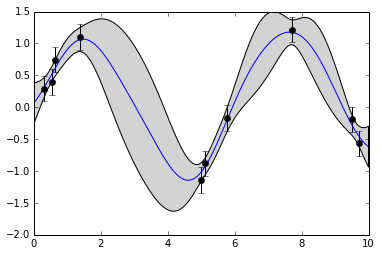

In [6]:
plt.fill_between(t,mu-std_,mu+std_,facecolor='lightgray')
plt.plot(t,mu)
plt.errorbar(x,y,marker='o',ls='None', yerr=yerr,c='black')